In [1]:
import os
import itertools

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.ticker
import matplotlib.pyplot as plt

In [2]:

pal = sns.color_palette(['#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377', '#BBBBBB'])
sns.set_palette(pal)

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['figure.figsize'] = (4.5,1.5)
mpl.rcParams['figure.dpi'] = 100

In [3]:
results_folder = os.path.join(".", "results")
cleaned_folder = os.path.join(".", "cleaned")
if not os.path.exists(cleaned_folder):
    os.makedirs(cleaned_folder)

In [4]:
for inc in range(0, 181, 5):
    # clean the file
    with open(os.path.join(results_folder, f"{inc}.txt"), "r") as f:
        lines = f.readlines()

    lines = [line.strip() for line in lines]

    # useful stuff is only in lines 26 to 50
    lines = lines[25:50]

    # split the lines into columns
    lines = [line.split(", ") for line in lines]

    with open(os.path.join(cleaned_folder, f"{inc}.csv"), "w") as f:
        f.write("al_thickness,total_dose,trapped_electrons,bremsstrahlung,trapped_protons\n")
        for line in lines:
            f.write(",".join(line) + "\n")

In [5]:
dfs = []

for inc in range(0, 181, 5):
    df = pd.read_csv(os.path.join(cleaned_folder, f"{inc}.csv"))
    df["inc"] = inc
    dfs.append(df)

df = pd.concat(dfs)
df.reset_index(inplace=True, drop=True)
df.head()

,al_thickness,total_dose,trapped_electrons,bremsstrahlung,trapped_protons,inc
0,0.05,3.5749,3.5667,0.008213,0.0,0
1,0.10,3.2454,3.2375,0.007897,0.0,0
2,0.20,2.8472,2.8401,0.007090,0.0,0
3,0.30,2.3813,2.3751,0.006132,0.0,0
4,0.40,1.9448,1.9394,0.005314,0.0,0


In [7]:
sns.heatmap(df.pivot("al_thickness", "inc", "total_dose"), cmap="viridis", norm=mpl.colors.LogNorm())
plt.ylabel("Aluminum Thickness (mm)")
plt.xlabel("Inclination (deg)")

TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given

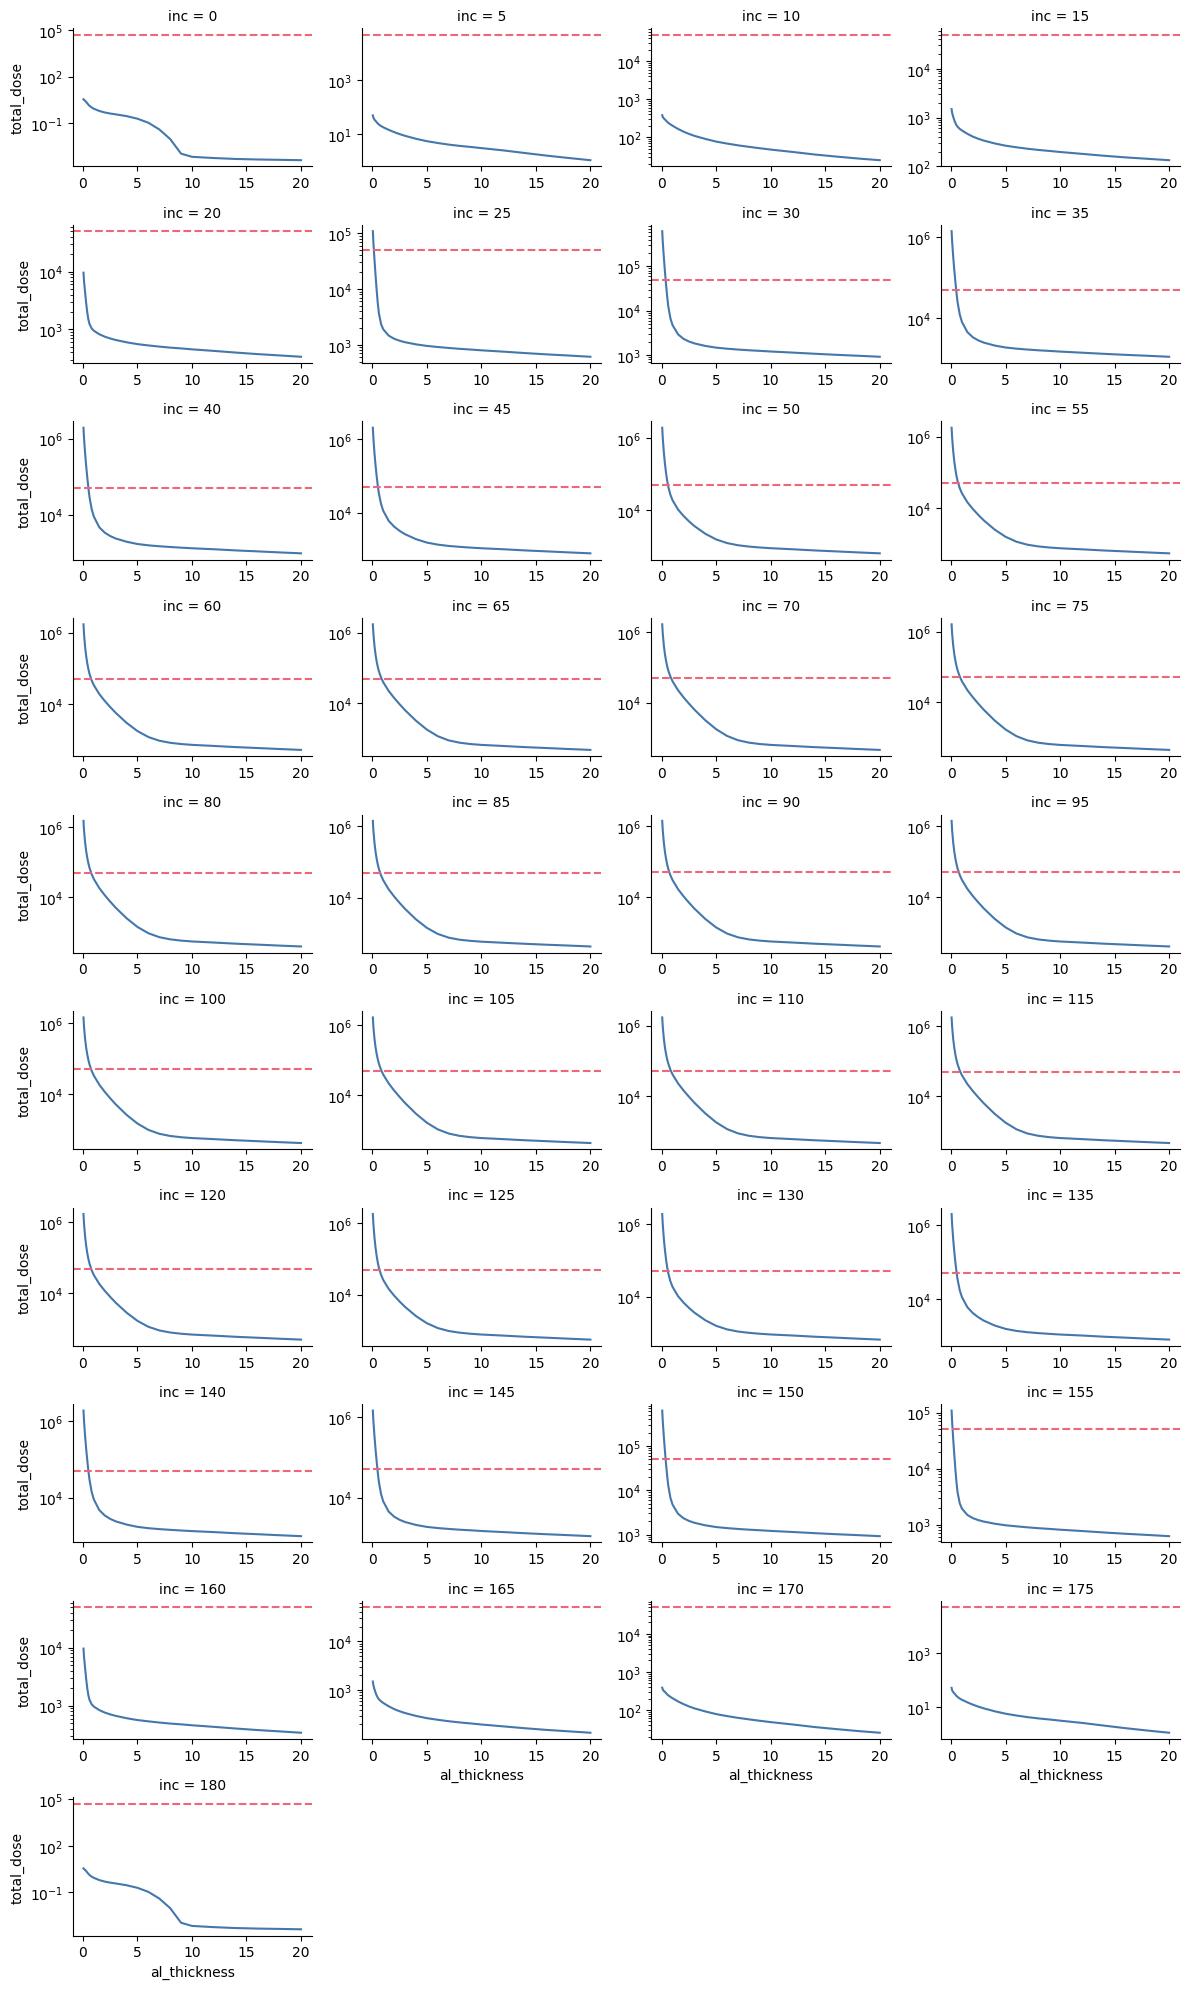

In [ ]:
g = sns.FacetGrid(df, col="inc", col_wrap=4, sharex=False, sharey=False, height=2, aspect=1.5)
g.map(sns.lineplot, "al_thickness", "total_dose", color=pal[0])
g.set(yscale="log")
g.map(plt.axhline, y=5e4, color=pal[1], ls="--")

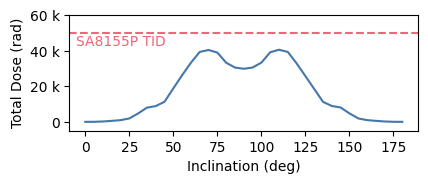

In [19]:
# 4mm Al is common
df_1mm = df[df.al_thickness == 1]

g = sns.lineplot(x="inc", y="total_dose", data=df_1mm, color=pal[0])
g.axhline(y=5e4, color=pal[1], ls="--")
g.text(20, 45e3, "SA8155P TID", color=pal[1], va="center", ha="center")
g.set(xlabel="Inclination (deg)", ylabel="Total Dose (rad)")
g.set(ylim=(-5e3, 60e3))
g.yaxis.set_major_formatter(matplotlib.ticker.EngFormatter(unit=""))
g.get_figure().savefig("./total-dose.pdf", bbox_inches="tight")